In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
os.chdir('Desktop/techbees/datasets/')

Data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y). 

In [3]:
bank_data = pd.read_csv('banking.csv')

In [4]:
bank_data.shape

(41188, 21)

In [5]:
bank_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [6]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

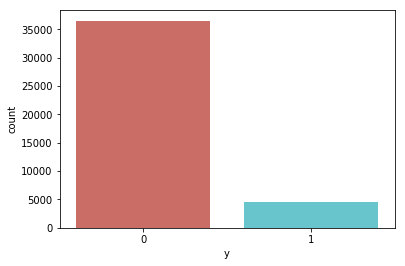

In [7]:
sns.countplot(x='y',data=bank_data, palette='hls')
plt.show()

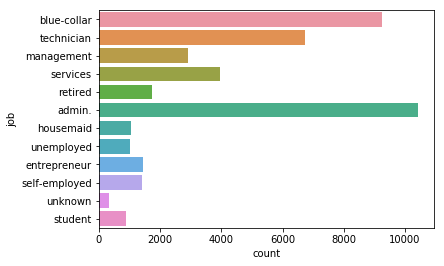

In [8]:
sns.countplot(y="job", data=bank_data)
plt.show()

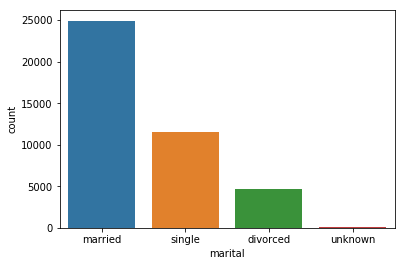

In [9]:
sns.countplot(x="marital", data=bank_data)
plt.show()

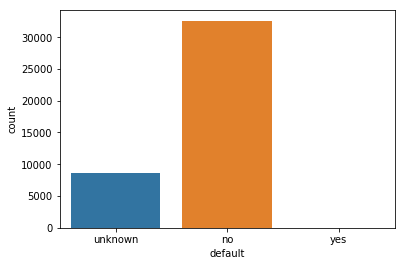

In [10]:
sns.countplot(x="default", data=bank_data)
plt.show()

In [11]:
bank_data.drop(bank_data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

In [12]:
bank_data.dtypes

job         object
marital     object
default     object
housing     object
loan        object
poutcome    object
y            int64
dtype: object

In [13]:
#Data Preprocessing
# Create dummy varibales
bank_data2 = pd.get_dummies(bank_data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [14]:
# Drop the unknown columns
bank_data2.drop(bank_data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
bank_data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

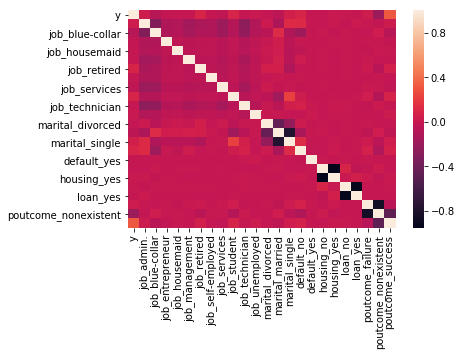

In [15]:
sns.heatmap(bank_data2.corr())
plt.show()

In [16]:
X = bank_data2.iloc[:,1:]
y = bank_data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
# Fit logistic regression to the training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
help(classifier.predict_proba)

Help on method predict_proba in module sklearn.linear_model.logistic:

predict_proba(X) method of sklearn.linear_model.logistic.LogisticRegression instance
    Probability estimates.
    
    The returned estimates for all classes are ordered by the
    label of classes.
    
    For a multi_class problem, if multi_class is set to be "multinomial"
    the softmax function is used to find the predicted probability of
    each class.
    Else use a one-vs-rest approach, i.e calculate the probability
    of each class assuming it to be positive using the logistic function.
    and normalize these values across all the classes.
    
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
    
    Returns
    -------
    T : array-like, shape = [n_samples, n_classes]
        Returns the probability of the sample for each class in the model,
        where classes are ordered as they are in ``self.classes_``.



In [25]:
y_pred_prob = classifier.predict_proba(X_test)
y_pred_prob[1:100]

NameError: name 'col' is not defined

In [20]:
# building confusion matrix
y_pred = classifier.predict(X_test)

In [21]:
y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9046  110]
 [ 912  229]]


In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

In [ ]:
y_pred

In [99]:
import statsmodels.api as sm

In [100]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:932: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                30891
Model:                            GLM   Df Residuals:                    30869
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 14 Feb 2019   Deviance:                          nan
Time:                        06:21:46   Pearson chi2:                 3.10e+04
No. Iterations:                   100   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1022      0.334     -3.304      0.001      -1.756      -0.448
job_admin.              -0.1269      0.213     -0.595      0.552      -0.545       0.291
job_blue-collar         -0.5654      0.215     -2.625      0.009      -0.987      -0.143
job_entrepreneur        -0.4095      0.239     -1.711      0.087      -0.878       0.060
job_housemaid           -0.3665      0.248     -1.480      0.139      -0.852       0.119
job_management          -0.2058      0.222     -0.929      0.353      -0.640       0.229
job_retired              0.7309      0.221      3.300      0.001       0.297       1.165
job_self-employed       -0.2532      0.235     -1.078      0.281      -0.713       0.207
job_services            -0.4703      0.221     -2.130      0.033      -0.903      -0.037
job_student              0.7132      0.232      3.077      0.002       0.259       1.167
job_technician          -0.3383      0.216     -1.568      0.117      -0.761       0.085
job_unemployed           0.0175      0.238      0.074      0.941      -0.449       0.484
marital_divorced        -0.3350      0.385     -0.869      0.385      -1.090       0.420
marital_married         -0.2691      0.381     -0.705      0.481      -1.017       0.479
marital_single          -0.0961      0.382     -0.251      0.802      -0.846       0.653
default_no               0.7315      0.062     11.757      0.000       0.610       0.853
default_yes          -6.844e+07   6.71e+07     -1.020      0.308      -2e+08    6.31e+07
housing_no              -0.4632      0.467     -0.992      0.321      -1.379       0.452
housing_yes             -0.4540      0.467     -0.972      0.331      -1.369       0.461
loan_no                  0.5008      0.467      1.073      0.283      -0.414       1.416
loan_yes                 0.4668      0.468      0.997      0.319      -0.450       1.384
poutcome_failure        -0.9748      0.119     -8.166      0.000      -1.209      -0.741
poutcome_nonexistent    -1.4064      0.115    -12.276      0.000      -1.631      -1.182
poutcome_success         1.2543      0.122     10.241      0.000       1.014       1.494
========================================================================================
"""

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

# Model evaluation metrics

In [26]:
# y_pred_final = pd.DataFrame()

In [27]:
y_pred = classifier.predict_proba(X_test)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [101]:
y_pred[0:5]

array([[0.92863216, 0.07136784],
       [0.87206729, 0.12793271],
       [0.91687402, 0.08312598],
       [0.89447559, 0.10552441],
       [0.91458038, 0.08541962]])

In [28]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [46]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [47]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [48]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [50]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'y_probability'})

In [56]:
y_pred_final.head(100)

,y,y_probability,predicted
0,0,0.071368,0
1,0,0.127933,0
2,0,0.083126,0
3,0,0.105524,0
4,0,0.085420,0
5,0,0.119544,0
6,0,0.105524,0
7,0,0.064221,0
8,0,0.121407,0
9,0,0.035549,0


In [53]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.y_probability.map( lambda x: 1 if x > 0.5 else 0)

In [62]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.y, y_pred_final.predicted )
confusion

array([[9046,  110],
       [ 912,  229]], dtype=int64)

In [77]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.y, y_pred_final.predicted)

0.9007477906186268

ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [67]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return thresholds

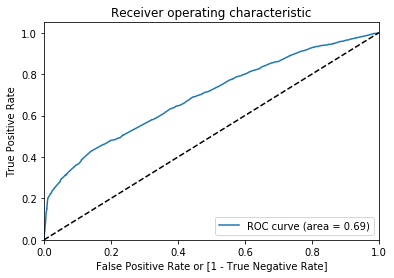

array([1.824579  , 0.824579  , 0.82294308, 0.82159027, 0.81854442,
       0.8179387 , 0.81655618, 0.79938124, 0.79789262, 0.79454336,
       0.79387771, 0.78885845, 0.78731252, 0.78314456, 0.69919688,
       0.69449311, 0.69252556, 0.69230184, 0.69200392, 0.69002749,
       0.66868215, 0.66662817, 0.66202505, 0.66127184, 0.66111318,
       0.65919532, 0.65903619, 0.65856785, 0.65417542, 0.65152256,
       0.65124121, 0.64913583, 0.64868578, 0.64458874, 0.6439489 ,
       0.63856823, 0.63284471, 0.62895151, 0.62678868, 0.62194744,
       0.62098934, 0.62046471, 0.61880823, 0.61828244, 0.61506097,
       0.6138081 , 0.61243264, 0.61161151, 0.61063692, 0.6102332 ,
       0.60843381, 0.60669693, 0.60351181, 0.60253011, 0.59740062,
       0.59522709, 0.5929949 , 0.58931611, 0.58920362, 0.58707393,
       0.58182568, 0.58106993, 0.57859585, 0.57633722, 0.57300623,
       0.57128916, 0.57073986, 0.57029137, 0.56802146, 0.56571857,
       0.56344299, 0.56282579, 0.56239766, 0.56167053, 0.56054

In [68]:
draw_roc(y_pred_final.y, y_pred_final.y_probability)

In [69]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.y_probability.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,y,y_probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.071368,0,1,0,0,0,0,0,0,0,0,0
1,0,0.127933,0,1,1,0,0,0,0,0,0,0,0
2,0,0.083126,0,1,0,0,0,0,0,0,0,0,0
3,0,0.105524,0,1,1,0,0,0,0,0,0,0,0
4,0,0.085420,0,1,0,0,0,0,0,0,0,0,0


In [70]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.y, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.110809  0.000000  1.000000
0.1   0.1  0.612703  0.609109  0.641543
0.2   0.2  0.875109  0.947248  0.296231
0.3   0.3  0.897737  0.982525  0.217353
0.4   0.4  0.900942  0.987877  0.203330
0.5   0.5  0.900748  0.987986  0.200701
0.6   0.6  0.898223  0.991918  0.146363
0.7   0.7  0.892493  0.998471  0.042068
0.8   0.8  0.890939  0.999563  0.019281
0.9   0.9  0.889191  1.000000  0.000000


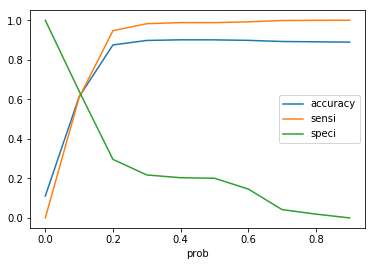

In [71]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])